In [1]:
class TreeNode():
    def __init__(self, val):
        self.val = val
        self.left: TreeNode | None = None
        self.right: TreeNode | None = None


In [2]:
for i in range (15):
    exec("n{} = TreeNode({})".format(i, i))
n1.left = n2
n1.right = n3
n2.left = n4
n2.right = n5
n3.left = n6
n3.right = n7
n4.left = n8
n4.right = n9
n5.right = n10
n6.left = n11
n7.right = n12

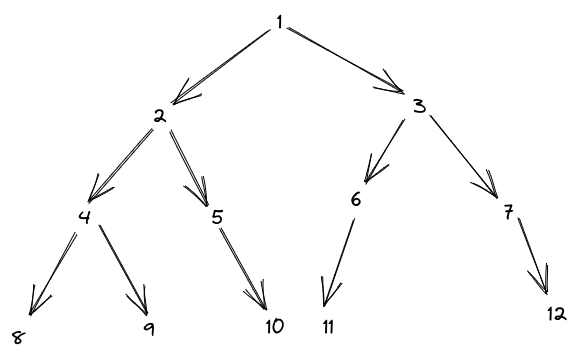

In [3]:
def level_order(root:TreeNode) -> list[int]:
    queue: [TreeNode] = [root]
    res = []
    while queue:
        node: TreeNode = queue.pop(0)
        res.append(node.val)
        if node.left is not None:
            queue.append(node.left)
        if node.right is not None:
            queue.append(node.right)
    return res

level_order(n1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [4]:
pre_res, in_res, post_res = [], [], []
def pre_order(root: TreeNode) -> list[int]:
    if root is None:
        return
    pre_res.append(root.val)
    pre_order(root.left)
    pre_order(root.right)
    return pre_res

def in_order(root: TreeNode) -> list[int]:
    if root is None:
        return
    in_order(root.left)
    in_res.append(root.val)
    in_order(root.right)
    return in_res

def post_order(root: TreeNode) -> list[int]:
    if root is None:
        return
    post_order(root.left)
    post_order(root.right)
    post_res.append(root.val)
    return post_res

print(f"pre: {pre_order(n1)}\nin: {in_order(n1)}\npost{post_order(n1)}")

pre: [1, 2, 4, 8, 9, 5, 10, 3, 6, 11, 7, 12]
in: [8, 4, 9, 2, 5, 10, 1, 11, 6, 3, 7, 12]
post[8, 9, 4, 10, 5, 2, 11, 6, 12, 7, 3, 1]


In [5]:
def morris(root: TreeNode):
    res:[int] = []
    current = root
    while current:
        if current.left is None:
            res.append(current.val)
            current = current.right
        else:
            predecessor = current.left
            while predecessor.right is not None and predecessor.right is not current:
                predecessor = predecessor.right
            if predecessor.right is None:
                predecessor.right = current
                current = current.left
            else:
                predecessor.right = None
                res.append(current.val)
                current = current.right
    return res

morris(n1)

[8, 4, 9, 2, 5, 10, 1, 11, 6, 3, 7, 12]